## Лабораторная работа 2.

### Пчелкина Ю.Ж., группа 6231-010402D
### Вариант № 1

Набор данных CIFAR-10 

#### Полносвязная нейронная сеть

Реализовать нейронную сеть, состоящую из двух полносвязных слоев и решающую задачу классификации на наборе данных из лабораторной работы 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scripts.classifiers.neural_net import TwoLayerNet

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Добавьте реализации методов класса TwoLayerNet . Проверьте вашу реализацию на модельных данных

In [4]:
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

#### Прямой проход: вычисление выхода сети

Реализуйте первую часть метода TwoLayerNet.loss, вычисляющую оценки классов для входных данных.

Сравните ваш выход сети с эталонными значениями. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-7) .

In [5]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()


print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.680272087688147e-08


#### Прямой проход: вычисление loss

Реализуйте вторую часть метода, вычисляющую значение функции потерь. Сравните с эталоном. Ошибка должна быть очень маленькой (можете ориентироваться на значение < 1e-12) .

In [6]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.018965419606062905


#### Обратный проход

Реализуйте третью часть метода loss. Используйте численную реализацию расчета градиента для проверки вашей реализации обратного прохода. Если прямой и обратный проходы реализованы верно, то ошибка будет < 1e-8 для каждой из переменных W1, W2, b1, и b2.

In [7]:
from scripts.gradient_check import eval_numerical_gradient

In [8]:


loss, grads = net.loss(X, y, reg=0.05)

for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 8.002490e-01
W2 max relative error: 3.333333e-01
b1 max relative error: 2.738421e-09
b2 max relative error: 3.865070e-11


#### Обучение нейронной сети на смоделированных данных

Реализуйте методы TwoLayerNet.train и TwoLayerNet.predict. Обучайте сеть до тех пор, пока значение loss не будет < 0.02.

Final training loss:  0.01714416569445271


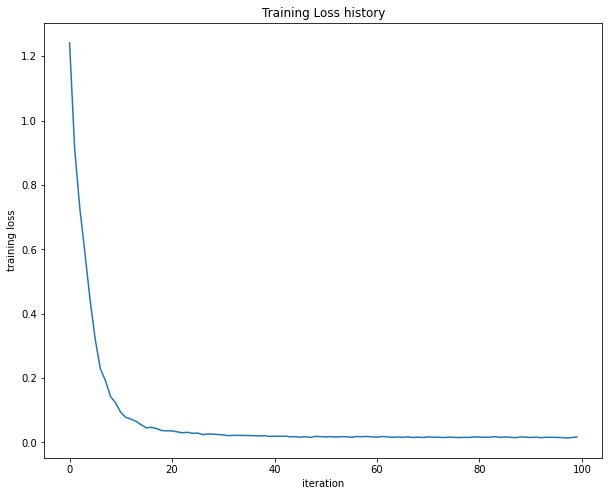

In [9]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])


plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

#### Обучение нейронной сети на реальном наборе данных (CIFAR-10, MNIST)

Загрузите набор данных, соответствующий вашему варианту.

Разделите данные на обучающую, тестовую и валидационную выборки.

Выполните предобработку данных, как в ЛР 1.

Обучите нейронную сеть на ваших данных.

При сдаче лабораторной работы объясните значения всех параметров метода train.

In [10]:
from tensorflow.keras.datasets import cifar10
cifar = cifar10.load_data()

In [11]:
# x - изображение, y - метки классов
(X_train, y_train), (X_test, y_test) = cifar

In [12]:
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


- X_train, y_train - тренировочный набор данных

- X_train : uint8 Массив NumPy данных изображения в градациях серого с фигурами (50000, 32, 32, 3), содержащий обучающие данные. Значения пикселей варьируются от 0 до 255.

- y_train : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой (50000, 1)для обучающих данных.

- X_test : uint8 Массив NumPy данных изображения в градациях серого с фигурами (10000, 32, 32, 3), содержащий тестовые данные. Значения пикселей варьируются от 0 до 255.

- y_test : uint8 Массив меток NumPy (целые числа в диапазоне 0-9) с формой (10000, 1)для тестовых данных.




In [13]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]


mask = np.random.choice(num_training, num_dev, replace = False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

y_train = np.reshape(y_train, (y_train.shape[0],))
y_val = np.reshape(y_val, (y_val.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))




print ('Тренировочные данные:  X =', X_train.shape, ', Y = ', y_train.shape)
print ('Тестовая выборка:  X =', X_test.shape, ', Y = ', y_test.shape)
print ('Валидационная выборка:  X =', X_dev.shape, ', Y = ', y_dev.shape)


Тренировочные данные:  X = (49000, 3072) , Y =  (49000,)
Тестовая выборка:  X = (1000, 3072) , Y =  (1000,)
Валидационная выборка:  X = (500, 3072) , Y =  (500,)


Параметры обучения:

- num_iters - количество итераций (эпох) обучения
- batch_size - размер батча (подмножество из обучающего набора) для обучения
- learning_rate - параметр, указывающий на скорость обучения
- learning_rate_decay - параметр, уменьшающий скорость обучения после каждой эпохи
- reg - параметр регуляризации для настройки весов
- verbose - для вывода информации об обучении

In [14]:
input_size = 32 * 32 * 3

hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302776
iteration 100 / 1000: loss 2.299894
iteration 200 / 1000: loss 2.252728
iteration 300 / 1000: loss 2.144033
iteration 400 / 1000: loss 2.095383
iteration 500 / 1000: loss 2.060717
iteration 600 / 1000: loss 1.897600
iteration 700 / 1000: loss 1.953323
iteration 800 / 1000: loss 1.888054
iteration 900 / 1000: loss 1.953455
Validation accuracy:  0.312


Используя параметры по умолчанию, вы можете получить accuracy, примерно равный 0.29.

Проведите настройку гиперпараметров для увеличения accuracy. Поэкспериментируйте со значениями гиперпараметров, например, с количеством скрытых слоев, количеством эпох, скорости обучения и др. Ваша цель - максимально увеличить accuracy полносвязной сети на валидационном наборе. Различные эксперименты приветствуются. Например, вы можете использовать методы для сокращения размерности признакового пространства (например, PCA), добавить dropout слои и др.

Для лучшей модели вычислите acсuracy на тестовом наборе.

In [15]:
# с параметрами по умолчанию
input_size = 32 * 32 * 3

hidden_size = 50
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 100: loss 2.302607
Validation accuracy:  0.133


In [16]:
# увеличим количество эпох обучения и уменьшим размер батча, увеличим параметр регуляризации для настройки весов
input_size = 32 * 32 * 3

hidden_size = 50
num_classes = 10

net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=100,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.8, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 5000: loss 2.303181
iteration 100 / 5000: loss 2.302149
iteration 200 / 5000: loss 2.256781
iteration 300 / 5000: loss 2.140358
iteration 400 / 5000: loss 2.120553
iteration 500 / 5000: loss 2.067016
iteration 600 / 5000: loss 2.182433
iteration 700 / 5000: loss 2.118189
iteration 800 / 5000: loss 2.046221
iteration 900 / 5000: loss 2.003787
iteration 1000 / 5000: loss 2.021543
iteration 1100 / 5000: loss 2.041595
iteration 1200 / 5000: loss 1.926416
iteration 1300 / 5000: loss 2.041308
iteration 1400 / 5000: loss 1.857750
iteration 1500 / 5000: loss 1.771101
iteration 1600 / 5000: loss 1.757764
iteration 1700 / 5000: loss 1.796506
iteration 1800 / 5000: loss 1.726695
iteration 1900 / 5000: loss 1.936894
iteration 2000 / 5000: loss 1.756454
iteration 2100 / 5000: loss 1.911242
iteration 2200 / 5000: loss 1.797281
iteration 2300 / 5000: loss 1.685093
iteration 2400 / 5000: loss 1.835587
iteration 2500 / 5000: loss 1.758734
iteration 2600 / 5000: loss 1.712514
iteration 270

Для отладки процесса обучения часто помогают графики изменения loss и accuracy в процессе обучения. Ниже приведен код построения таких графиков.

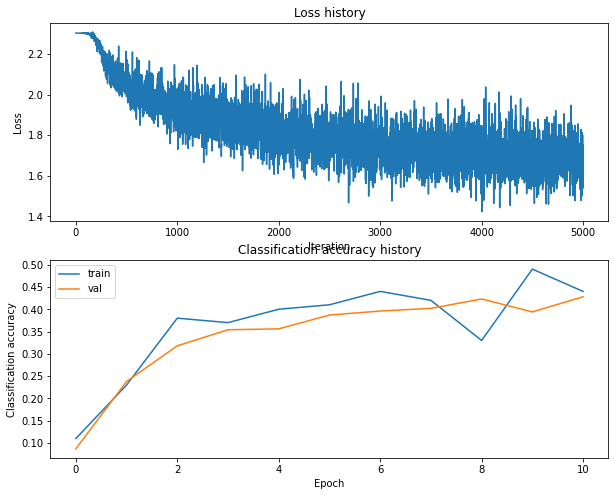

In [17]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

In [18]:
from scripts.vis_utils import visualize_grid

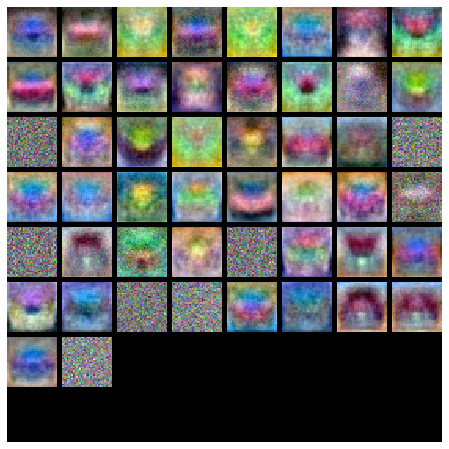

In [19]:
def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

Сделайте выводы по результатам работы.

Большая точность при обучении была достигнута при:
- увеличении количество эпох
- уменьшении размера батча
- изменении параметр регуляризации для настройки весов